**CREDIT CARD FRAUD** **DETECTION**

by Srijita Ghosh Hajra


#  Overview:
In this notebook, I will try to predict credit card fraud detection with the help of given dataset.

kaggle datasets download -d kartik2112/fraud-detection








Importing Libraries

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

loading the dataset to a Pandas DataFrame

In [61]:
df = pd.read_csv('fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [62]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
12240,12240,25-06-2020 05:33,3.002910e+13,fraud_McGlynn-Heathcote,misc_net,1.93,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833.0,Metallurgist,09-10-1970,8c1f11aafa459e3451eb208b35542232,1.372138e+09,41.265908,-79.036434,0.0
12241,12241,25-06-2020 05:33,3.009300e+13,"fraud_Harris, Gusikowski and Heaney",grocery_net,40.43,Jessica,Terry,F,6412 Elizabeth Gardens Suite 633,...,38.6207,-83.8067,14228.0,Advertising account executive,26-03-1971,336a11cbd872e37a1ec16c4a0d3fd985,1.372138e+09,39.616267,-82.814765,0.0
12242,12242,25-06-2020 05:35,4.740710e+15,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,314.78,Heather,Hines,F,13776 Hicks Plains,...,41.1901,-74.0436,9993.0,Pensions consultant,16-10-1962,b08d116eece2a4eb02140dc47c05c550,1.372139e+09,40.225546,-73.772452,0.0
12243,12243,25-06-2020 05:36,4.550600e+15,"fraud_Effertz, Welch and Schowalter",entertainment,50.19,Angela,West,F,9471 Wong Islands,...,40.7559,-82.5123,92985.0,Press photographer,29-05-1968,44ad27d23842e9748da61c46cee2727e,1.372139e+09,40.579471,-82.020798,0.0
12244,12244,25-06-2020 05:37,6.042293e+10,fraud_Gleason-Macejkovic,shopping_net,1.26,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12245 entries, 0 to 12244
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12245 non-null  int64  
 1   trans_date_trans_time  12245 non-null  object 
 2   cc_num                 12245 non-null  float64
 3   merchant               12245 non-null  object 
 4   category               12245 non-null  object 
 5   amt                    12245 non-null  float64
 6   first                  12245 non-null  object 
 7   last                   12245 non-null  object 
 8   gender                 12245 non-null  object 
 9   street                 12245 non-null  object 
 10  city                   12245 non-null  object 
 11  state                  12244 non-null  object 
 12  zip                    12244 non-null  float64
 13  lat                    12244 non-null  float64
 14  long                   12244 non-null  float64
 15  ci

Exploratory Data Analysis

In [64]:
df.isnull().values.any()

True

In [65]:
# checking the number of missing values in each column
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [66]:
# compare the values for both transactions
df.groupby('is_fraud').mean()

<ipython-input-66-743004324afb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0.0,6121.294831,4.118601e+17,65.295310,48532.712788,38.500183,-90.029027,94636.550504,1.371957e+09,38.487348,-90.027042
1.0,6189.189189,2.890135e+15,556.931081,36693.135135,35.931370,-82.830200,43646.432432,1.371963e+09,35.967140,-82.868207


In [67]:
## Get the Fraud and the normal dataset

fraud = df[df['is_fraud']==1]

valid = df[df['is_fraud']==0]

In [69]:
print(fraud.shape,valid.shape)

(37, 23) (12207, 23)


In [70]:
fraud.amt.describe()

count      37.000000
mean      556.931081
std       389.969690
min         7.820000
25%       250.320000
50%       723.230000
75%       900.770000
max      1128.260000
Name: amt, dtype: float64

In [71]:
valid.amt.describe()

count    12207.000000
mean        65.295310
std        118.887525
min          1.000000
25%          9.250000
50%         44.330000
75%         80.100000
max       3396.840000
Name: amt, dtype: float64

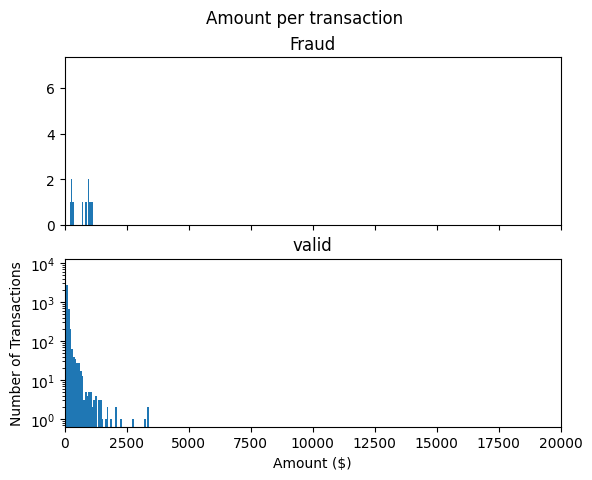

In [72]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(valid.amt, bins = bins)
ax2.set_title('valid')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [ ]:
## Take some sample of the data

data= df.sample(frac = 0.1,random_state=1)

data.shape

In [74]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7657,7657,23-06-2020 12:16,4.149240e+15,fraud_Schulist Ltd,food_dining,68.51,Tanner,Carroll,M,494 Burke Ports,...,40.1008,-80.0652,632.0,Dealer,08-04-1989,ce3d7a63a49184b668981ae2b01f679b,1.371990e+09,39.869438,-79.241080,0.0
2524,2524,22-06-2020 04:03,2.131620e+14,"fraud_Connelly, Reichert and Fritsch",gas_transport,62.71,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190.0,Animal nutritionist,17-04-1970,c0b2cb014f4137c847b561f71c8b297d,1.371874e+09,45.309018,-70.233845,0.0
8950,8950,23-06-2020 18:37,4.364010e+15,fraud_Price Inc,shopping_net,1.80,Gary,Martinez,M,03512 Jackson Ports,...,39.5483,-119.7957,276896.0,Immunologist,12-03-1997,873889338af56579399bf4a6e29d6b64,1.372013e+09,39.096837,-120.417221,0.0
3272,3272,22-06-2020 09:35,4.378990e+15,fraud_Cummerata-Jones,gas_transport,47.98,Travis,Hayes,M,1561 Chase Grove,...,43.9742,-71.1503,3807.0,Surgeon,25-10-1999,8eb4aee13608aca7801cbf513c31b370,1.371894e+09,44.433489,-70.574066,0.0
3530,3530,22-06-2020 11:33,3.691360e+13,fraud_Schamberger-O'Keefe,grocery_pos,225.92,Ana,Mccormick,F,4503 Patricia Route,...,43.6498,-116.4306,84106.0,Intelligence analyst,11-02-1971,3459fa0ee505624106e77d421113fe7f,1.371901e+09,42.695088,-116.408439,0.0


In [75]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7299,7299,23-06-2020 09:19,2.131530e+14,fraud_Conroy-Cruickshank,gas_transport,58.84,Rebecca,Conley,F,181 Moreno Light Apt. 215,...,45.4963,-89.7273,9594.0,Seismic interpreter,23-11-1997,008511d8e1fe69bd29f0fae52d74f644,1.371979e+09,46.168579,-90.542567,0.0
2245,2245,22-06-2020 01:47,6.759460e+11,"fraud_Reilly, Heaney and Cole",gas_transport,39.80,Ellen,Smith,F,285 George Lake,...,40.7687,-80.3592,28425.0,Podiatrist,09-06-2000,9431b57effa079f7d81adb06c2fae8da,1.371866e+09,41.039251,-81.308530,0.0
8169,8169,23-06-2020 14:57,2.131620e+14,fraud_Schuppe LLC,entertainment,54.93,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190.0,Animal nutritionist,17-04-1970,d4ac0b43255cf2b8fe6bda0da055a963,1.371999e+09,44.756975,-71.241836,0.0
1941,1941,21-06-2020 23:31,3.018140e+13,"fraud_Dare, Casper and Bartoletti",kids_pets,122.66,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016.0,Local government officer,25-12-1953,eb7e937634cea50ed504461715048d26,1.371857e+09,43.487761,-120.679524,0.0
9778,9778,23-06-2020 22:47,5.714650e+11,fraud_Kulas Group,health_fitness,75.73,Louis,Fisher,M,45654 Hess Rest,...,43.0048,-108.8964,1645.0,Freight forwarder,26-02-1976,e9c7d99fc215e8773b2d3c32dfff53fc,1.372028e+09,43.523873,-109.701683,0.0


In [76]:
data['is_fraud'].value_counts()

0.0    1219
1.0       5
Name: is_fraud, dtype: int64

In [77]:
data.groupby('is_fraud').mean()

<ipython-input-77-5098c4639619>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0.0,6102.679245,4.172807e+17,63.090189,48279.57096,38.56625,-89.867861,78688.560295,1.371956e+09,38.543356,-89.867852
1.0,5207.200000,3.144342e+15,522.258000,51855.80000,32.30600,-86.359180,65474.200000,1.371930e+09,32.068749,-86.349667


In [101]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data[data['is_fraud']==1]

valid = data[data['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(valid))

In [103]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(valid)))

0.004101722723543888
Fraud Cases : 5
Valid Cases : 1219


<ipython-input-79-74e3088b4734>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


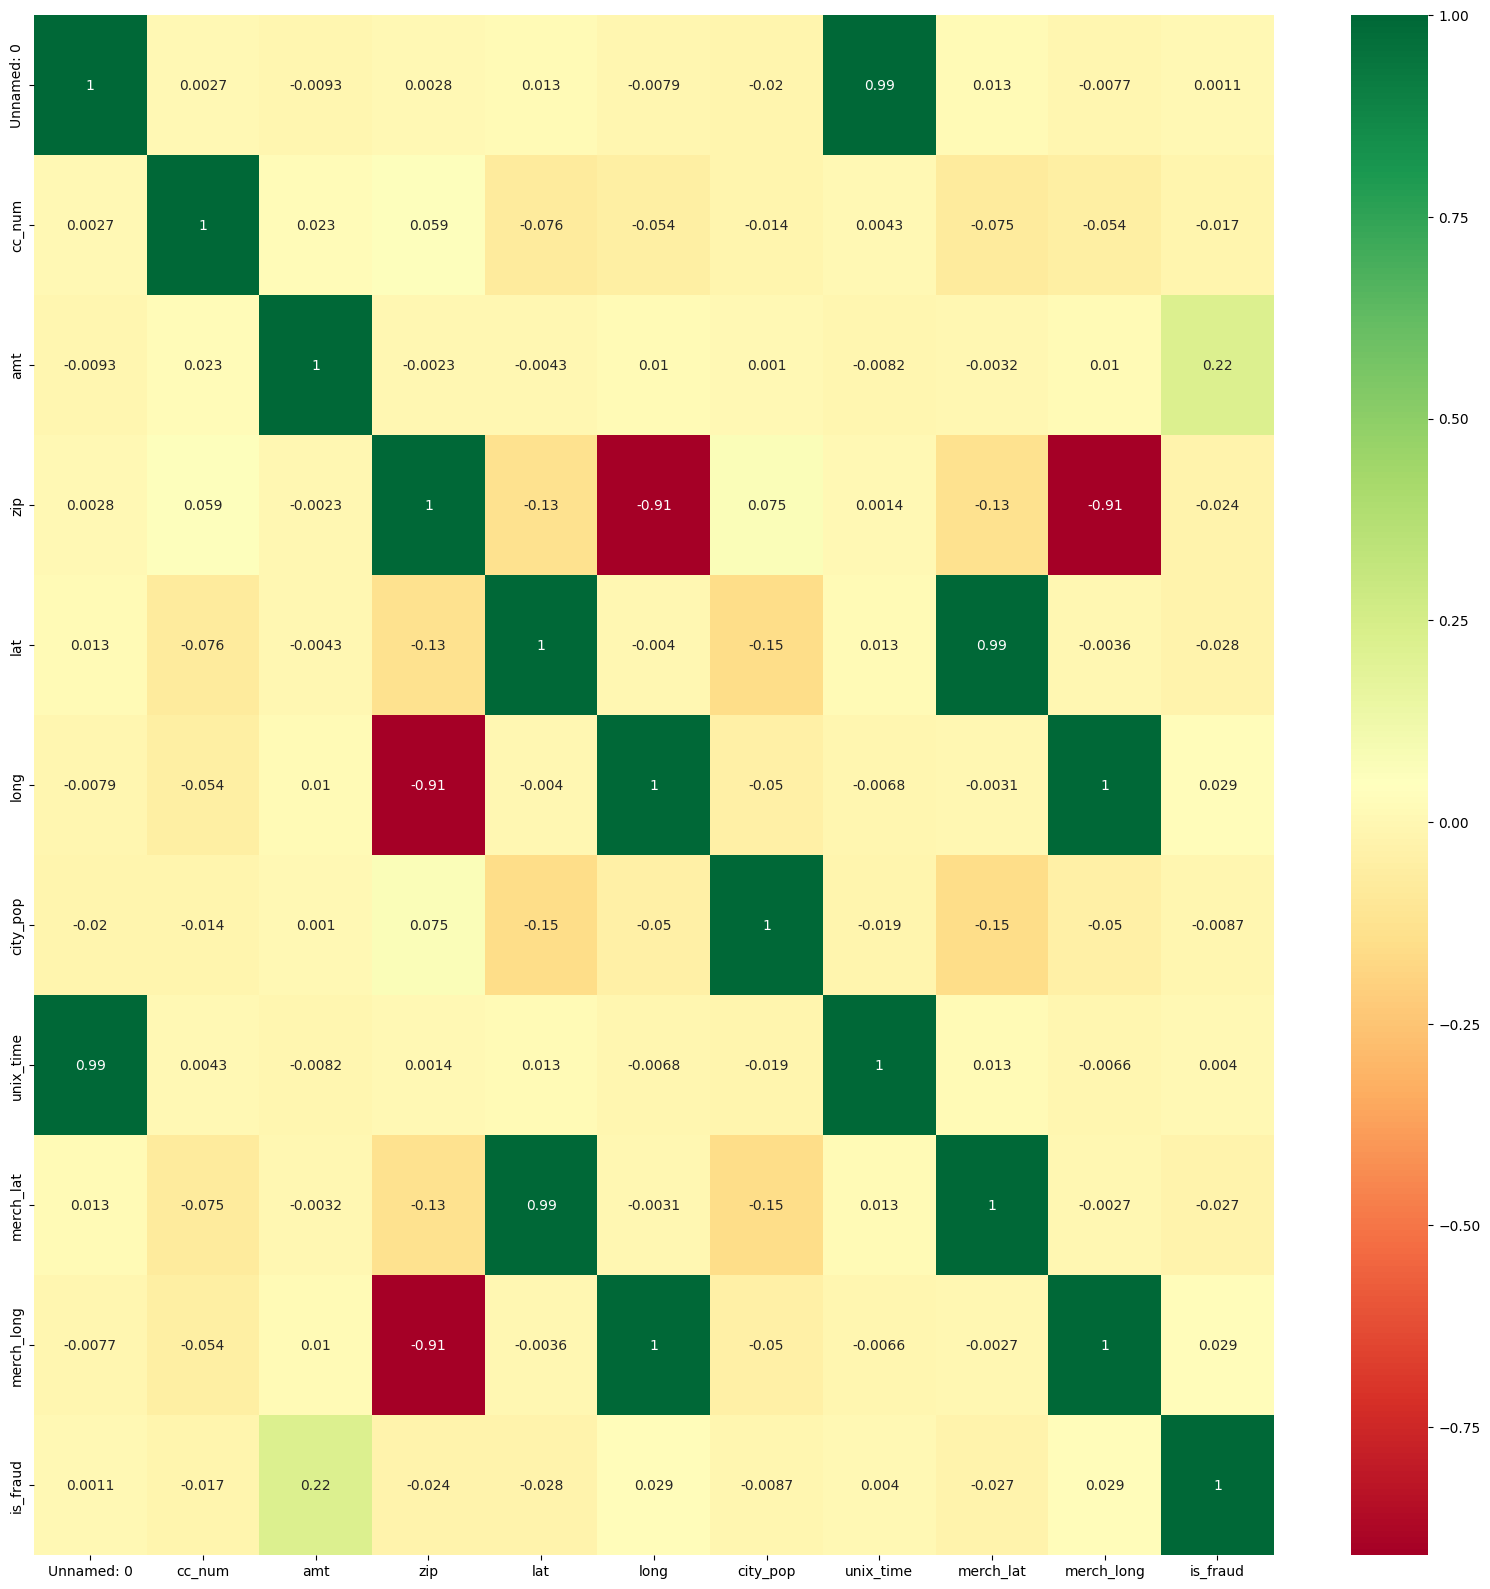

In [79]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [80]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting
target = "is_fraud"
# Define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1224, 22)
(1224,)


Splitting the data into Features & Targets

In [81]:
X1 = data.drop(['is_fraud',"merchant","category","first","last","street","job","city","state","trans_date_trans_time","dob"	, "trans_num"], axis=1)
Y = data['is_fraud']

In [82]:
X1

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
7657,7657,4.149240e+15,68.51,M,15324.0,40.1008,-80.0652,632.0,1.371990e+09,39.869438,-79.241080
2524,2524,2.131620e+14,62.71,F,4226.0,44.6084,-70.6993,190.0,1.371874e+09,45.309018,-70.233845
8950,8950,4.364010e+15,1.80,M,89512.0,39.5483,-119.7957,276896.0,1.372013e+09,39.096837,-120.417221
3272,3272,4.378990e+15,47.98,M,3818.0,43.9742,-71.1503,3807.0,1.371894e+09,44.433489,-70.574066
3530,3530,3.691360e+13,225.92,F,83646.0,43.6498,-116.4306,84106.0,1.371901e+09,42.695088,-116.408439
...,...,...,...,...,...,...,...,...,...,...,...
7299,7299,2.131530e+14,58.84,F,54487.0,45.4963,-89.7273,9594.0,1.371979e+09,46.168579,-90.542567
2245,2245,6.759460e+11,39.80,F,15010.0,40.7687,-80.3592,28425.0,1.371866e+09,41.039251,-81.308530
8169,8169,2.131620e+14,54.93,F,4226.0,44.6084,-70.6993,190.0,1.371999e+09,44.756975,-71.241836
1941,1941,3.018140e+13,122.66,F,97753.0,44.2415,-121.0113,2016.0,1.371857e+09,43.487761,-120.679524


In [83]:
X1.isnull().values.any()

False

In [84]:
X = pd.get_dummies(X1,columns=['gender'])
X.head(5)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M
7657,7657,4.149240e+15,68.51,15324.0,40.1008,-80.0652,632.0,1.371990e+09,39.869438,-79.241080,0,1
2524,2524,2.131620e+14,62.71,4226.0,44.6084,-70.6993,190.0,1.371874e+09,45.309018,-70.233845,1,0
8950,8950,4.364010e+15,1.80,89512.0,39.5483,-119.7957,276896.0,1.372013e+09,39.096837,-120.417221,0,1
3272,3272,4.378990e+15,47.98,3818.0,43.9742,-71.1503,3807.0,1.371894e+09,44.433489,-70.574066,0,1
3530,3530,3.691360e+13,225.92,83646.0,43.6498,-116.4306,84106.0,1.371901e+09,42.695088,-116.408439,1,0


In [85]:
Y

7657    0.0
2524    0.0
8950    0.0
3272    0.0
3530    0.0
       ... 
7299    0.0
2245    0.0
8169    0.0
1941    0.0
9778    0.0
Name: is_fraud, Length: 1224, dtype: float64

Split the data into Training data & Testing Data

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [87]:
print(X.shape, X_train.shape, X_test.shape)

(1224, 12) (979, 12) (245, 12)


Model Training

Logistic Regression

In [88]:
model = LogisticRegression()

In [89]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [90]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [91]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9959141981613892


In [92]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [93]:
print('Accuracy  on Test Data : ', test_data_accuracy)

Accuracy  on Test Data :  0.9959183673469387


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [94]:
# Assuming the target column is named 'is_fraud' and all other columns are features
X2 = data.drop('is_fraud', axis=1)
y = data['is_fraud']


In [95]:
X2_train, X2_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest

In [97]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X2_train, y_train)


RandomForestClassifier(random_state=42)

In [98]:
y_train_pred = rf_model.predict(X2_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_model.predict(X2_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")

Train Accuracy: 1.0
Test Accuracy: 1.0


Conclusion:


1.   Using Logistic regression, accuracy of training and testing data are 0.9943007452871547 and 0.9947460595446584 respectively.
2.   Using Random forest accuracy of training and testing data are 0.1.0 and 0.9982486865148862 respectively.
3. So, we can see that my model performs well using Random Forest for predict credit card fraud detection.

